

¿Cuál industria paga mejor? Relación entre salario que gana y la industria que trabaja (Irene)

3.1. ¿Salario con género?

3.2. Crear 25_salario_new, con lo hecho por Irene.


In [2]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [3]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [4]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)


,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [5]:
df['genero_new_q2'] = df['q2_genero'].replace({
'Man': 'Man', 
'Woman': 'Woman', 
'Prefer to self-describe': 'Others', 
'Nonbinary': 'Others', 
'Prefer not to say': 'Others'}) 

In [6]:
df['educacion_new_q4'] = df['q4_educacion'].replace({
'Master’s degree': 'Master’s degree', 
'Bachelor’s degree': 'Bachelor’s degree', 
'Doctoral degree': 'Doctoral degree',
'Professional doctorate': 'Professional doctorate',
'No formal education past high school': 'Others', 
'Some college/university study without earning a bachelor’s degree': 'Others', 
'I prefer not to answer': 'Others'}) 

In [7]:
df['q25_salario_limpia']= df['q25_salario'].replace({',':''}, regex=True)


In [8]:
def limpia_salario(salario):
    patron = "(\d+|\d+)"
    try:
        return re.findall(patron, str(salario))
    except: 
        np.nan

In [9]:
df['q25_salario_new'] = (df['q25_salario_limpia'].apply(limpia_salario))

In [10]:
df['salario1'] = df['q25_salario_new'].str.get(0)

In [11]:
df['salario1'] = df['salario1'].astype('Int64', errors = 'raise')

In [12]:
df['salario2'] = df['q25_salario_new'].str.get(1)

In [13]:
df['salario2'] = df['salario2'].astype('Int64', errors = 'raise')

In [14]:
df['media_salario'] = df[['salario1', 'salario2']].mean(axis  = 1)

In [15]:
df['media_salario'].head()

0    27499.5
1    64999.5
2      499.5
3    34999.5
4    34999.5
Name: media_salario, dtype: float64

In [16]:
df['media_salario'].dtype

dtype('float64')

In [17]:
df_analistas = df[df["q5_ocupacion"]== "Data Analyst"]

# ¿Qué industria paga mejor a los Data Anlalyst?

In [18]:
df_industria = df_analistas.groupby('q20_i_actual').mean()
df_industria.reset_index(inplace=True)
df_industria.head()

,q20_i_actual,salario1,salario2,media_salario
0,Academics/Education,15362.416107,15204.387205,16935.743289
1,Accounting/Finance,27490.234375,33967.75,30728.992188
2,Broadcasting/Communications,23877.55102,29978.591837,26928.071429
3,Computers/Technology,21161.157025,26941.14876,24051.152893
4,Energy/Mining,22431.818182,27930.818182,25181.318182


In [19]:
df_industria_ordenado = df_industria.sort_values('media_salario', ascending = False)


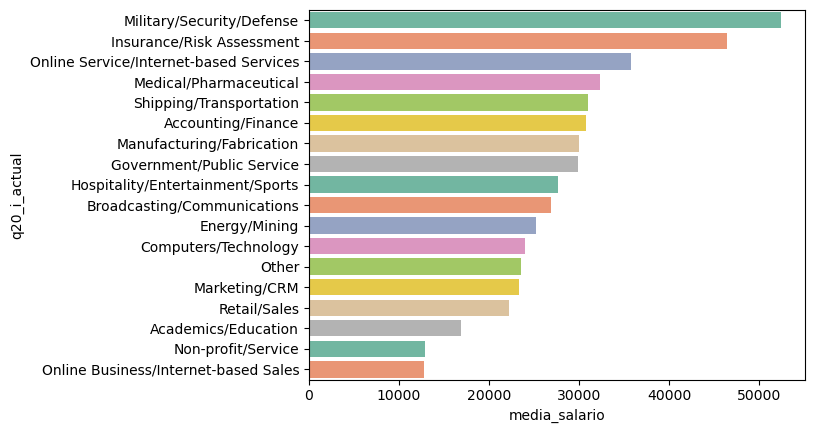

In [20]:
sns.barplot(y='q20_i_actual', x = 'media_salario', data= df_industria_ordenado, palette = 'Set2')


plt.show()


# Para ver las industrias, en España, que mejor pagan:

In [21]:
df_españa_ind = df_analistas[df_analistas['q3_país'] == 'Spain']

In [22]:
df_industria2 = df_españa_ind.groupby('q20_i_actual').mean()
df_industria2.reset_index(inplace=True)
df_industria2.head(20)

,q20_i_actual,salario1,salario2,media_salario
0,Academics/Education,39625.0,47499.0,43562.000000
1,Accounting/Finance,12000.0,15665.666667,13832.833333
2,Computers/Technology,25000.0,29999.0,27499.500000
3,Energy/Mining,40000.0,49999.0,44999.500000
4,Government/Public Service,45000.0,54999.0,49999.500000
5,Medical/Pharmaceutical,45000.0,54999.0,49999.500000
6,Online Service/Internet-based Services,60000.0,69999.0,64999.500000
7,Other,20000.0,25499.0,22749.500000
8,Retail/Sales,30000.0,36665.666667,33332.833333
9,Shipping/Transportation,40000.0,49999.0,44999.500000


In [23]:
df_industria_ordenado_esp = df_industria2.sort_values('media_salario', ascending = False)


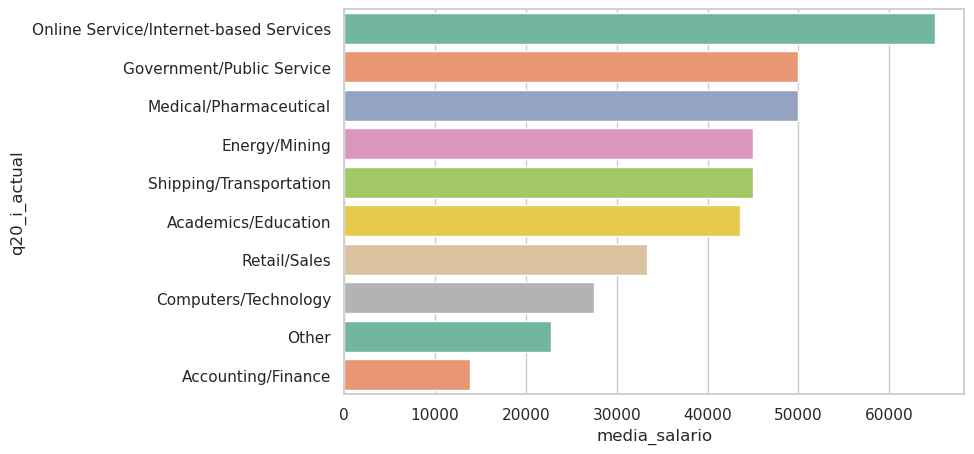

In [25]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q20_i_actual', x = 'media_salario', data= df_industria_ordenado_esp , palette = 'Set2')


plt.show()


Algunas diferencias respecto al gráfico global: En España, en segundo lugar está el servicio público (En el primer gráfico en segundo lugar estaría la indsutria farmacéutica) En españa está mejor pagado comparativamente, se cobra 55 mil euros de media anual.
Otros cambios importantes que vemos: aquí accounting finance está en último lugar, con un sueldo medio de 13800 euros. Muy por debajo  de la media global en este sector, cuya media es de 30700 euros anuales.
En ambos gráficos vemos que destacan los trabajos relacionados con el servicio online, tanto a nivel global como en nuestro territorio es la industria que mejor paga y a donde igual podemos ir echando el ojo como futuras analistas, jejeje.

¿Por qué?

## ¿Y como está colocado el analista de datos respecto a otros puestos en cuánto a salario?

In [46]:
df_salario_ocupacion = df.groupby('q5_ocupacion').mean()

In [47]:
df_salario_ocupacion.reset_index(inplace=True)

In [48]:
df_salario_ocupacion['q5_ocupacion'].unique()


array(['Business Analyst', 'Currently not employed',
       'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
       'Data Scientist', 'Developer Relations/Advocacy',
       'Machine Learning Engineer', 'Other', 'Product Manager',
       'Program/Project Manager', 'Research Scientist',
       'Software Engineer', 'Statistician', 'Student'], dtype=object)

In [56]:
df_salario_ocupacion = df_salario_ocupacion[(df_salario_ocupacion['q5_ocupacion'] != 'Student') & (df_salario_ocupacion['q5_ocupacion'] != 'Currently not employed') ]
df_ocu_ordenado = df_salario_ocupacion.sort_values('media_salario', ascending = False)

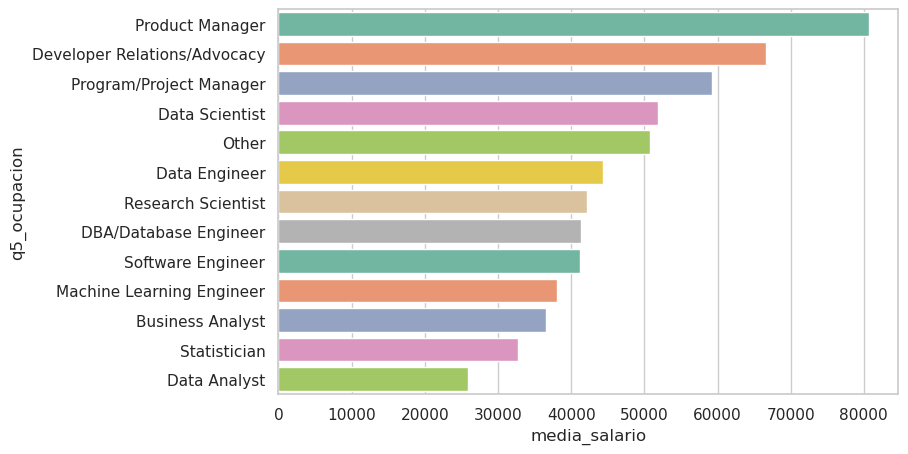

In [58]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q5_ocupacion', x = 'media_salario', data= df_ocu_ordenado , palette = 'Set2')


plt.show()

¡Vaya! Somos los peores pagados de nuestra lista

## ¿Y la brecha de género?

In [68]:
df_an_genero_sal = df_analistas.groupby('genero_new_q2').mean().reset_index()

In [69]:
df_gen_ordenado = df_an_genero_sal.sort_values('media_salario', ascending = False).reset_index()

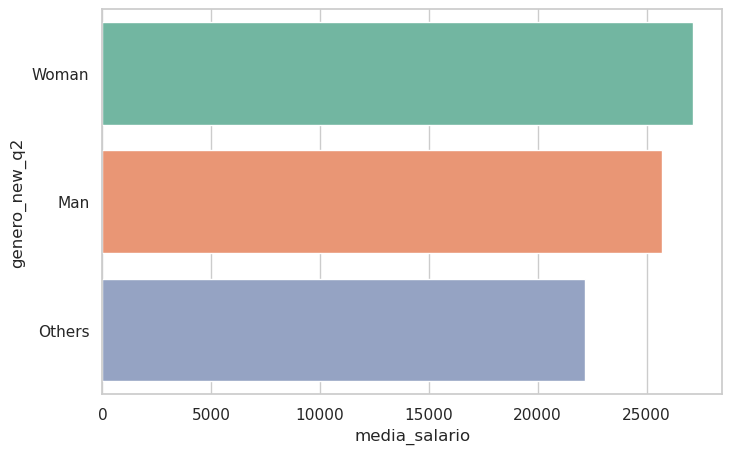

In [70]:
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='genero_new_q2', x = 'media_salario', data= df_gen_ordenado , palette = 'Set2')


plt.show()

Mira tú

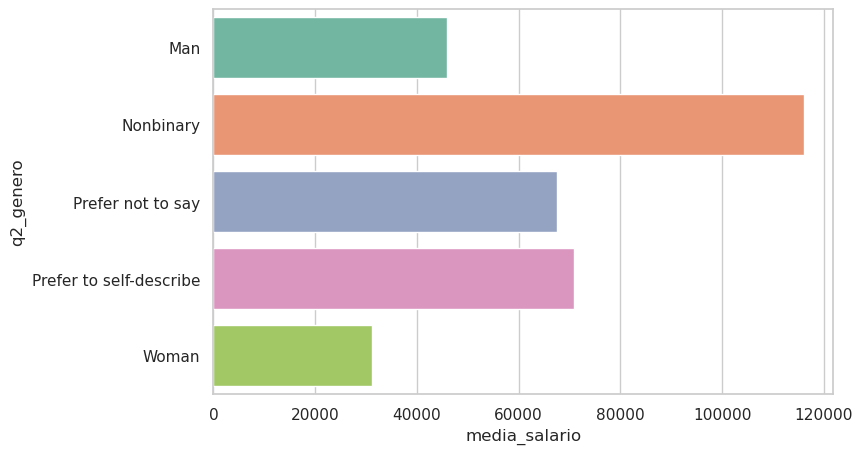

In [73]:
df_an_genero_sal2 = df.groupby('q2_genero').mean().reset_index()
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q2_genero', x = 'media_salario', data= df_an_genero_sal2 , palette = 'Set2')


plt.show()


In [ ]:
df_an_genero_sal2 = df.groupby('genero_').mean().reset_index()
plt.figure(figsize= (8,5))
sns.set_theme(style="whitegrid")# grid
sns.barplot(y='q2_genero', x = 'media_salario', data= df_an_genero_sal2 , palette = 'Set2')


plt.show()